In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
# data import and parsing
df = pd.read_csv("fcc-forum-pageviews.csv", index_col = "date", parse_dates = ["date"])
# data cleaning
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)
df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]
df.head()


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
#3x plots
def draw_line_plot():
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df_cleaned.index, df_cleaned['value'], color='red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    
    fig.savefig('line_plot.png')
    return fig


def draw_bar_plot():
    
    df_bar = df_cleaned.copy()
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month_name()

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(12,6))
    sns.barplot(data = df_bar, x = 'year', y = 'value', hue = 'month', ci = None, palette='tab10', ax=ax)
    ax.set_title("Average daily page views for each month grouped by year")
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.legend(title="Months", loc="upper left")
    


    
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    
    df_box = df_cleaned.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box['date']]
    df_box['month'] = [d.strftime('%b') for d in df_box['date']]
    
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.barplot(data = df_box, x="year", y="value", ax=axes[0])
    sns.boxplot(data=df_box, x="month", y="value", order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ax=axes[1])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Values")
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Pages Views")



    fig.savefig('box_plot.png')
    return fig


C:\Users\Const\AppData\Local\Temp\ipykernel_11020\863701407.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df_bar, x = 'year', y = 'value', hue = 'month', ci = None, palette='tab10', ax=ax)


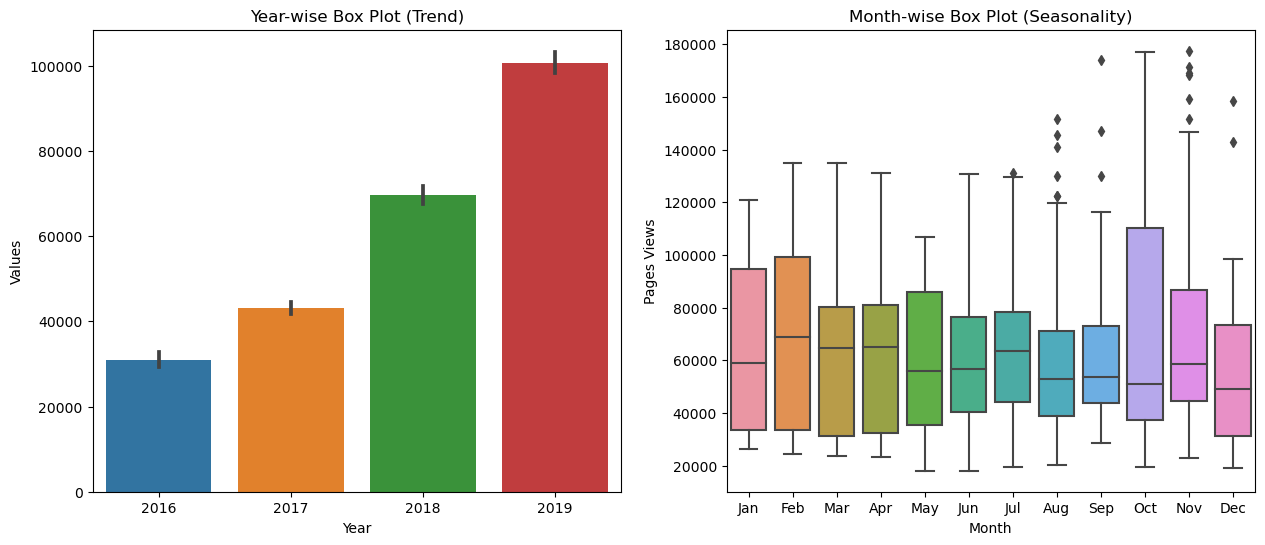

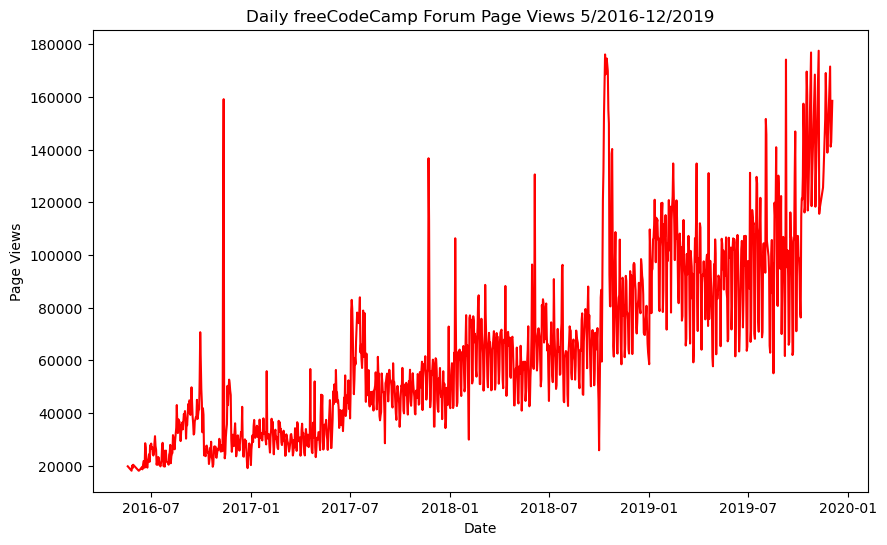

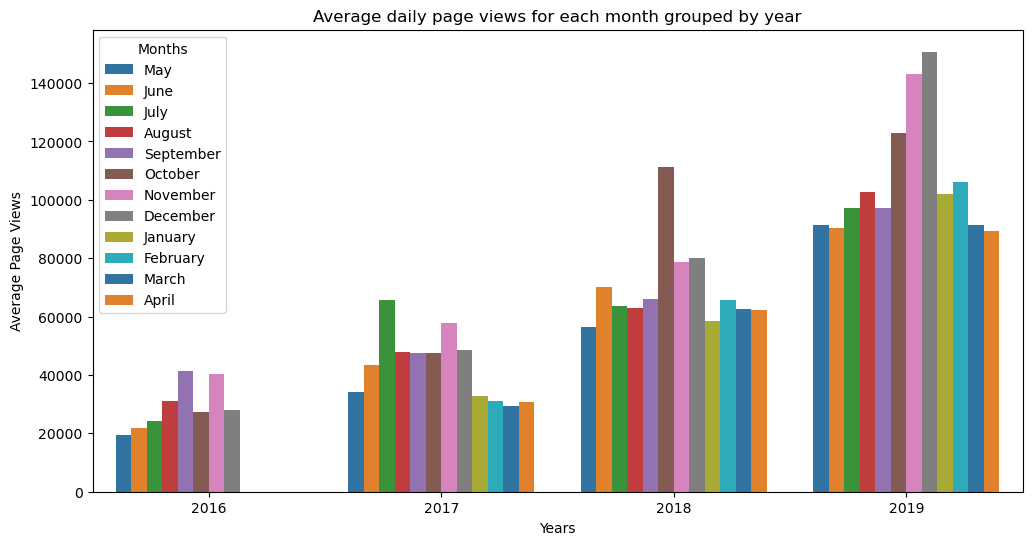

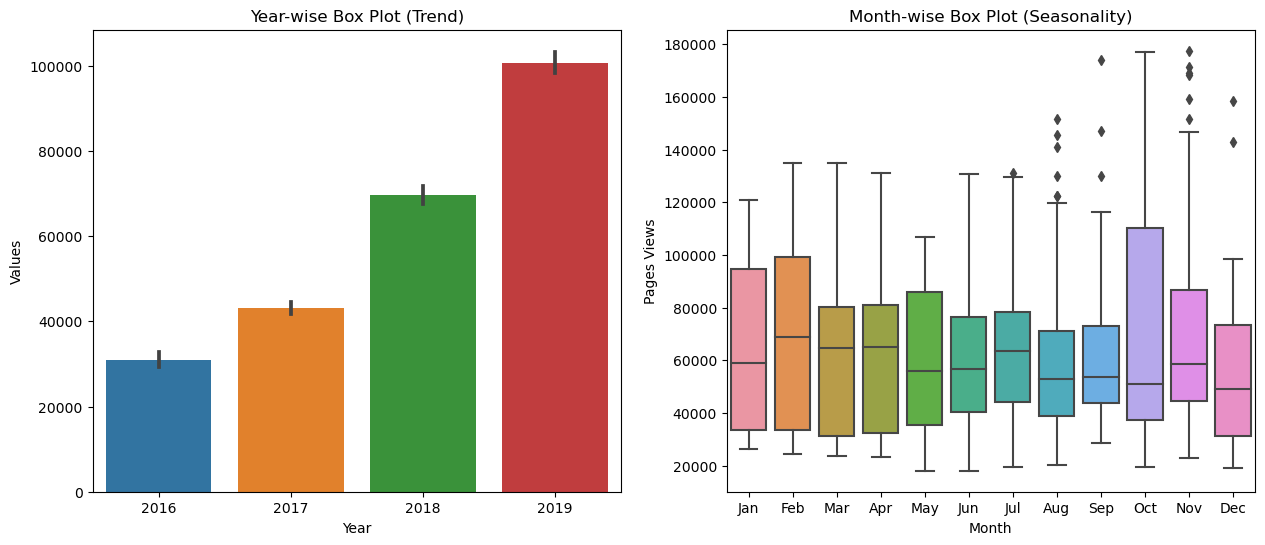

In [4]:
draw_line_plot()
draw_bar_plot()
draw_box_plot()